In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

# Import Densenet from Keras
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

In [ ]:
trdata = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,
    #fill_mode= 'nearest',

)
traindata = trdata.flow_from_directory('/content/drive/Shareddrives/Thenerdone/Dataset A(3k Small)/Train',
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,
                                    )
tsdata = ImageDataGenerator(rescale=1./255)
testdata = tsdata.flow_from_directory('/content/drive/Shareddrives/Thenerdone/Dataset A(3k Small)/Test',
                                      target_size=(224,224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=False,
                                    )


Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [ ]:
traindata.class_indices

{'Covid-19': 0, 'Normal': 1, 'Pneumonia': 2}

In [ ]:
testdata.class_indices

{'Covid-19': 0, 'Normal': 1, 'Pneumonia': 2}

In [ ]:
# Create the base pre-trained model
base_model = DenseNet121(weights='/content/drive/Shareddrives/Thenerdone/Weights Coursera/Coursera.hdf5', include_top=False)

In [ ]:
# Print the model summary
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, None, None,   0          ['input_3[0][0]']                
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_4[0][0]']       
                                64)                                                     

In [ ]:
base_model.trainable = False

In [ ]:
x = base_model.output
x

<KerasTensor: shape=(None, None, None, 1024) dtype=float32 (created by layer 'relu')>

In [ ]:
x=Conv2D(128,(3,3),activation='relu')(x)

In [ ]:
# Add a global spatial average pooling layer
x_pool = GlobalAveragePooling2D()(x)
x_pool

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'global_average_pooling2d_2')>

In [ ]:
predictions = Dense(3, activation="softmax")(x_pool)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])
# (You'll customize the loss function in the assignment!)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, None, None,   0          ['input_3[0][0]']                
 D)                             3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_4[0][0]']       
                                64)                                                         

In [ ]:
hist = model.fit(
    traindata,
    #steps_per_epoch=8,
    epochs=3,
    validation_data=testdata,
    #validation_steps=2,
    #callbacks = [learning_rate_reduction]
)

Epoch 1/3
47/47 [==============================] - 36s 651ms/step - loss: 1.0345 - accuracy: 0.7193 - val_loss: 0.2000 - val_accuracy: 0.9633
Epoch 2/3
47/47 [==============================] - 29s 612ms/step - loss: 0.1696 - accuracy: 0.9427 - val_loss: 0.0756 - val_accuracy: 0.9800
Epoch 3/3
47/47 [==============================] - 29s 610ms/step - loss: 0.0792 - accuracy: 0.9727 - val_loss: 0.0925 - val_accuracy: 0.9533


In [ ]:
model.evaluate(traindata)

47/47 [==============================] - 27s 572ms/step - loss: 0.0553 - accuracy: 0.9847


[0.055302489548921585, 0.984666645526886]

In [ ]:
model.evaluate(testdata)

10/10 [==============================] - 3s 286ms/step - loss: 0.0925 - accuracy: 0.9533


[0.09251569956541061, 0.95333331823349]

In [ ]:
p = model.predict(testdata)

In [ ]:
pred_classes = np.argmax(p, axis=1)

In [ ]:
pred_classes

array([2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
true_classes = testdata.classes

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cm = confusion_matrix(true_classes,pred_classes)
cm

array([[ 87,   0,  13],
       [  0,  99,   1],
       [  0,   0, 100]])

In [ ]:
cmn=cm/cm.astype(np.float).sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
labels=['Covid-19','Normal','Pneumonia']

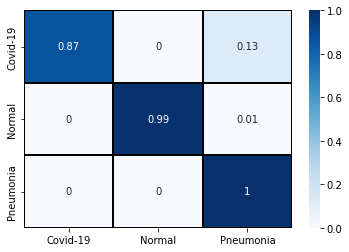

In [ ]:
sns.heatmap(cmn,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

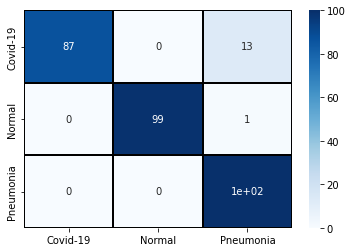

In [ ]:
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True,xticklabels = labels,yticklabels = labels)

In [ ]:
print(classification_report(true_classes,pred_classes, target_names = ['Covid-19 (Class 0)' ,'Normal (Class 1)','Pneumonia (Class 2']))

                    precision    recall  f1-score   support

Covid-19 (Class 0)       1.00      0.87      0.93       100
  Normal (Class 1)       1.00      0.99      0.99       100
Pneumonia (Class 2       0.88      1.00      0.93       100

          accuracy                           0.95       300
         macro avg       0.96      0.95      0.95       300
      weighted avg       0.96      0.95      0.95       300



In [ ]:

model.save("/content/drive/Shareddrives/Thenerdone/Models/DenseNet Paul_Pneu Paul_Norm Covid-3k Good.md5")

INFO:tensorflow:Assets written to: /content/drive/Shareddrives/Thenerdone/Models/DenseNet Paul_Pneu Paul_Norm Covid-3k Good.md5/assets


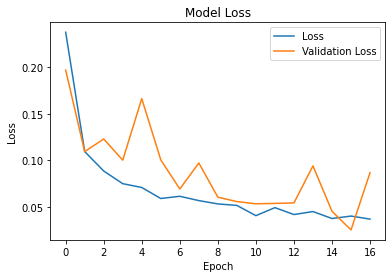

In [ ]:
#plt.plot(M.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss','Validation Loss'])
plt.show()

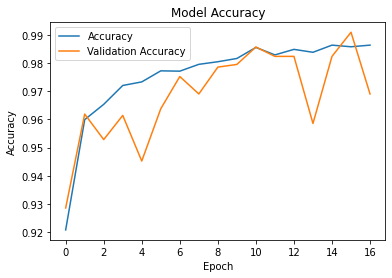

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy'])
plt.show()

In [ ]:
model.summary()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
model_builder = model
img_size = (224, 224)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv2d_1"

# The local path to our target image
img_path = "/content/drive/Shareddrives/Thenerdone/ChexPert - Covid 3k+/Test2/PneuPM/person1001_bacteria_2932.jpeg"

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [[-6.859353   2.2151055  7.3291526]]


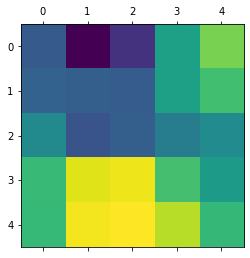

In [ ]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.7):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)